In [38]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier
from sklearn.model_selection import train_test_split,ValidationCurveDisplay
import sklearn.datasets, sklearn.tree
from sklearn.tree import DecisionTreeClassifier
sns.set(style='white',context='talk',palette='Set1')


### What is a classification task?

In classification, we predict **categories** or **labels** instead of numerical values. 
Some examples: 
* Using machine learning to classify medical images (such as X-rays, MRIs, or histopathology slides) to identify whether a patient has a specific disease.
* Predicting the function of proteins by classifying them into different functional categories based on their amino acid sequences. This is crucial for understanding cellular processes.

<img src="https://get-elevate.com/wp-content/uploads/2022/05/Multi-Class-Classification-Chart.png" width="300"/>

# Data 

We will use the [Pima diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database), originally from the National Institute of Diabetes and Digestive and Kidney Diseases..

The data contains several physiological and demographic features from which we want to predict if the patient has diabetes.


In [3]:
df = pd.read_csv("../data/pima-indians-diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Ex0

Calculate the number and percentage of positive outcomes (i.e., cases with diabetes) in the dataset.

In [35]:
#Your code here

Class counts:
Outcome
0    500
1    268
Name: count, dtype: int64

Class proportions:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [7]:
features = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df[features] # Features
y = df['Outcome'] # Target variable

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) # 70% training and 30% test

Taking a look at the data:

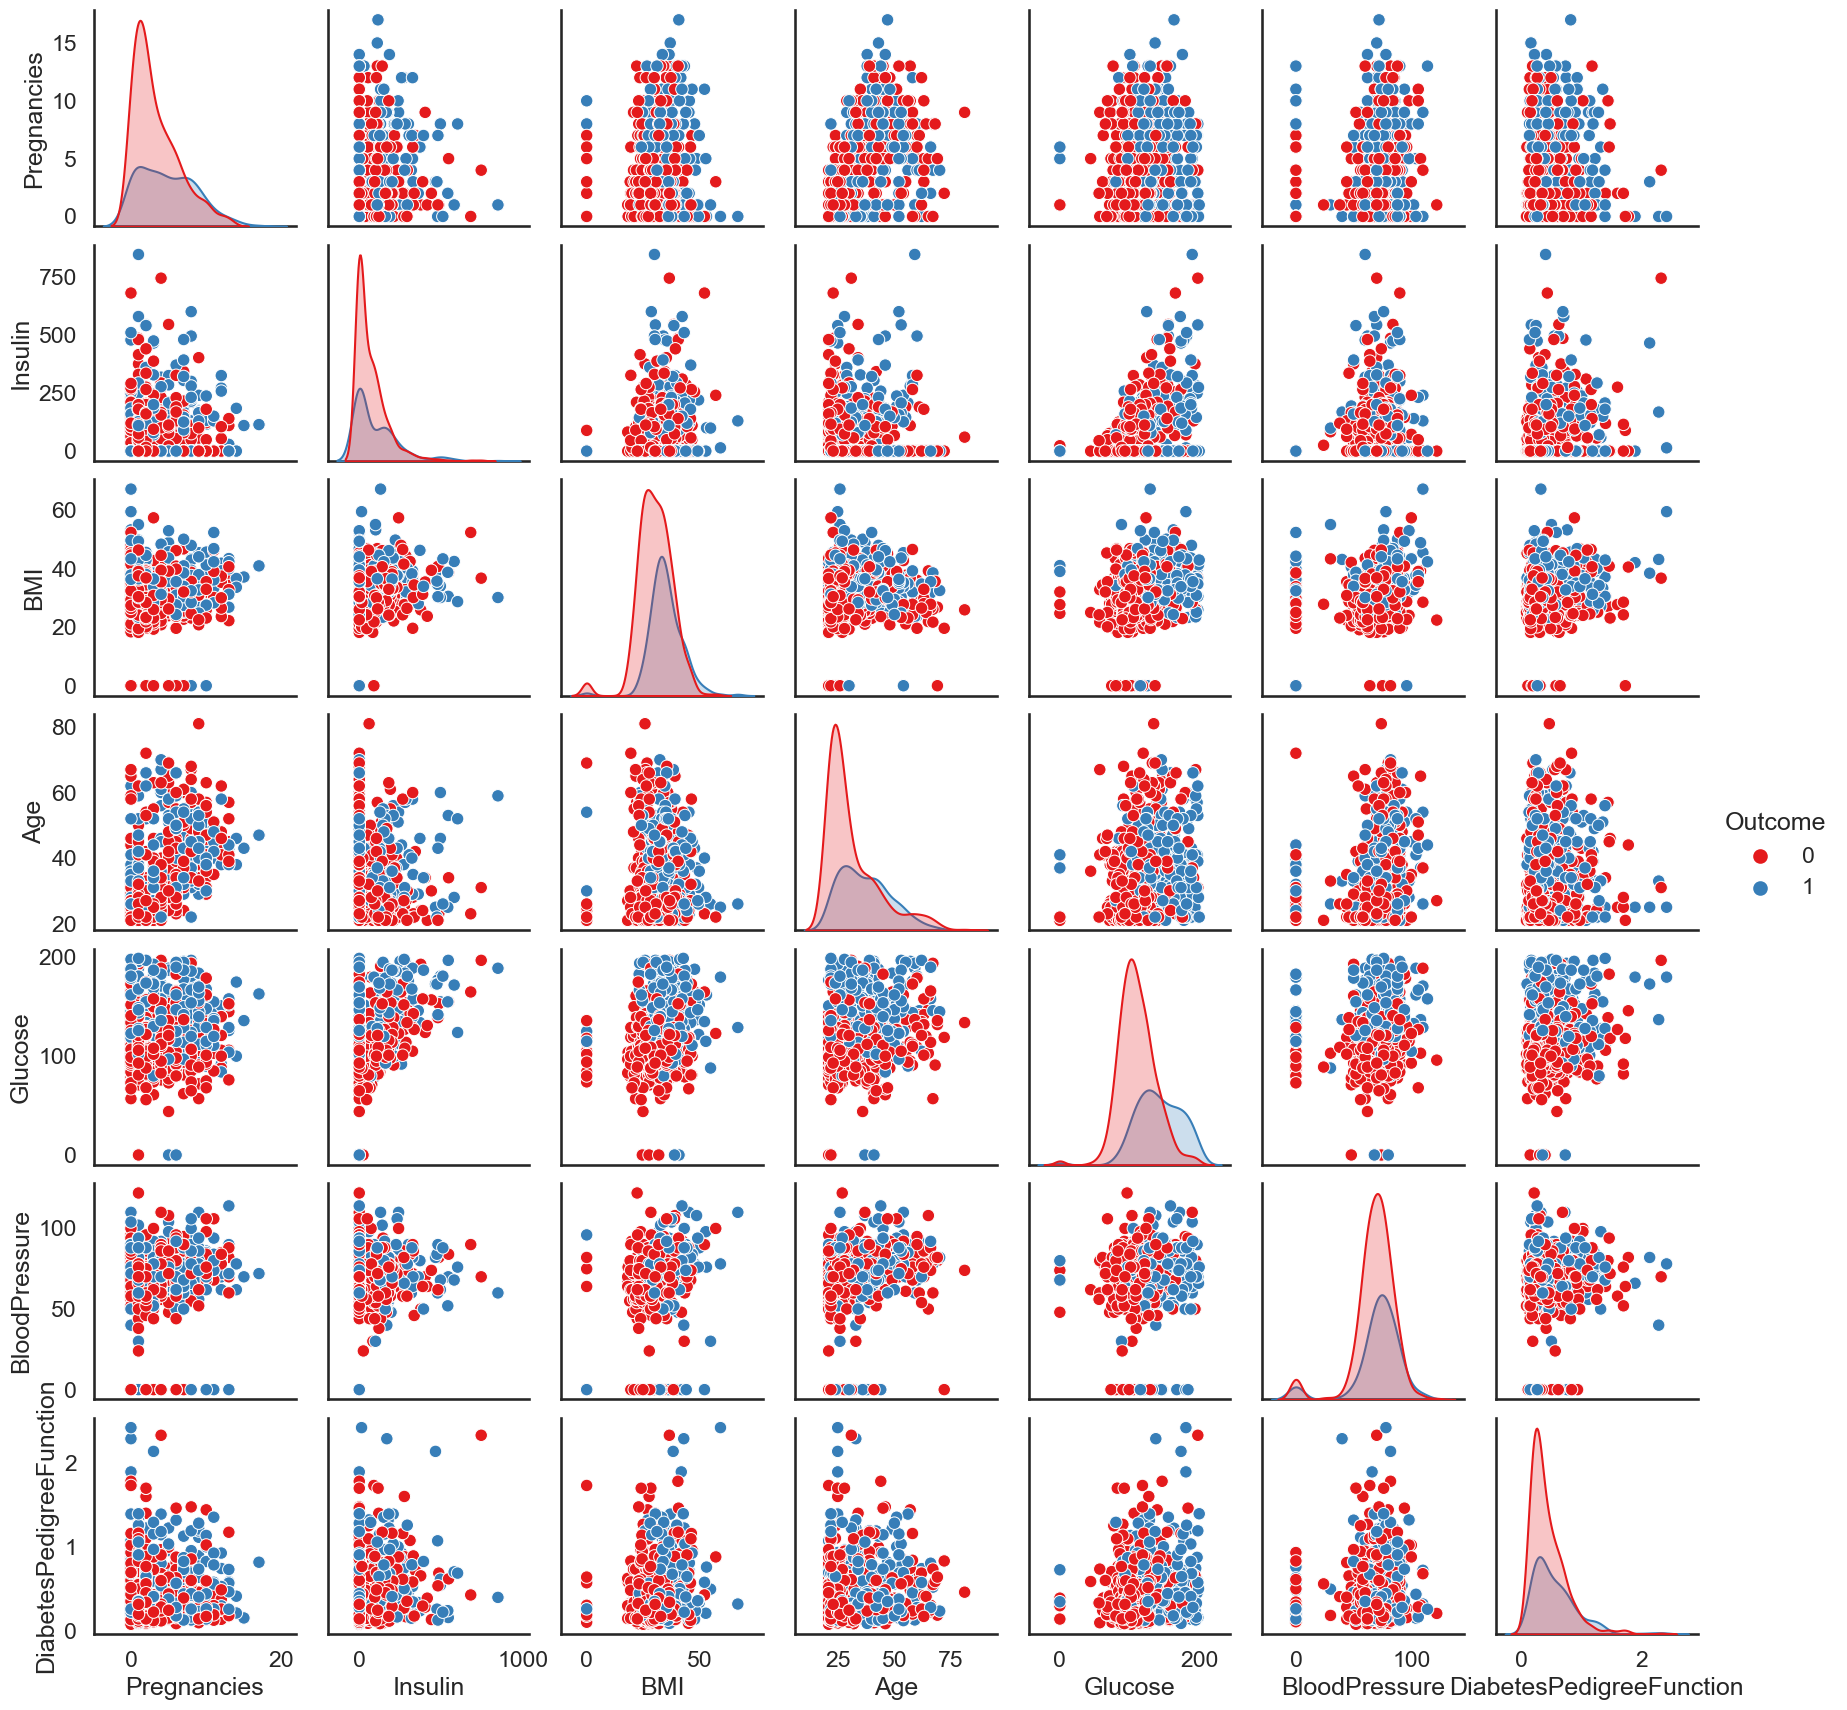

In [5]:
sns.pairplot(df, vars=features, hue='Outcome', palette='Set1');

#### K-nearest neighbors classifier (KNN)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXVTrMtw4a3fHx3kNJlBd_NtVWHmgxTBj5qw&s" width="500"/>
The simplest possible classifier is the nearest neighbor: given a new data point, it looks at its k nearest neighbors (from the training set) and predicts the class based on a majority vote.
We will use the `KNeighborsClassifier` function under `sklearn.neighbors`. 




In [9]:
import sklearn.neighbors as nb
knn = nb.KNeighborsClassifier()
knn.fit(X_train, y_train) 

KNeighborsClassifier()

### How can we measure the performance of a classification model?

<img src="https://cdn-images-1.medium.com/max/800/1*_JY_jxfndH8oBI3clamifA.png" width="400"/>


* *True positives (TP)*: # of observations we correctly predicted as positive. ("hit")
* *True negatives (TN)*: # of observations we correctly predicted as negative. ("correct rejection")
* *False positives (FP)*: # of observations we falsely predicted as positive. ("False alarm")
* *False negatives (FN)*: # of observations we falsely predicted as negative. ("False miss, underestimation")


* **Accuracy**: the proportion of correcly classified observations: (TP+TN)/(TP+TN+FP+FN)
* **True positive rate (TPR) /Sensitivity / Recall** : number of correct positives divided by total number of actual positives: TP/(TP+FN). Recall measures the ability of the classifier to find all positive samples. “Out of all the people who actually have diabetes, how many did the model correctly detect?”. How can we obtain perfect recall?
* **False positive rate (FPR)** Percentage of samples incorrectly classified as positives among the actual negatives. FP/(FP+TN). FPR measures the probability of a 'false alarm'. “Out of all the healthy people, how many did the model wrongly say have diabetes?”
* **Precision**: number of correct positives divided by all positive predictions: TP/(TP+FP). precision measures how accurate the positive predictions are. “Out of all the people the model said have diabetes, how many actually do?”\
How can we obtain perfect precision?

* **F1 score** : 2\*(Precision*Recall)/(Percision+Recall). It can be interpreted as the harmonic mean of precision and recall.



Let's predict the labels for the test data and compare with the real labels:

In [10]:
y_pred_knn = knn.predict(X_test)
print('Accuracy:', round((y_pred_knn == y_test).mean(),3))

Accuracy: 0.701


The number of true negatives, true positives, false negatives and true positives:

In [11]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()

### Exercise 1:
Using the tn,fp,fn,tp values, calculate the precision, recall and F1 score.

In [9]:
#Your codde here

The current model uses the default number of neighbors (n_neighbors=5) in KNeighborsClassifier. Use GridSearchCV to test different values for n_neighbors and find the value that gives the best performance.
Try a range of values and report the best one found.

In [58]:
#Your code here

Text(0, 0.5, 'Cross-Validated Accuracy')

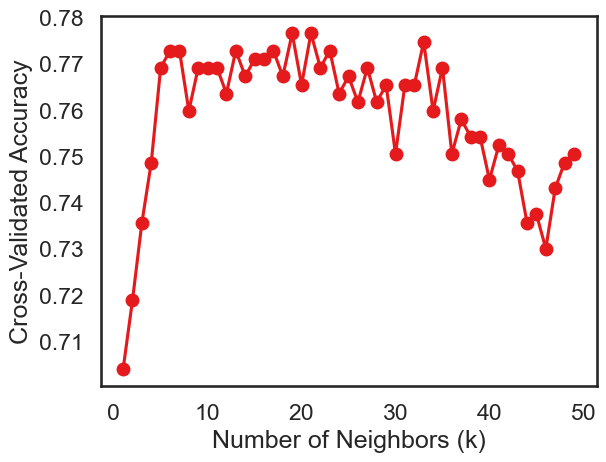

In [57]:
k_values = grid_search.cv_results_['param_n_neighbors'].data
mean_scores = grid_search.cv_results_['mean_test_score']
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')


What happens when the number of neighbors is small?
- Low bias: fits the training data very well.

- High variance: sensitive to noise and outliers.

- Prone to overfitting: may perform poorly on unseen data.

What happens when the number of neighbors is large?

- High bias: may miss complex patterns.

- Low variance: more stable predictions.

- Prone to underfitting: may be too simplistic.

### Logistic regression

Logistic regression is a statistical method commonly used for binary classification problems. Unlike linear regression, which predicts continuous values, logistic regression predicts the **probability of an instance belonging to a particular class**.

In our case, logsitic regression would estimate $P(y='Diabetes'|features)$, which of course ranges between 0 and 1. Given the estimated probability for a patient, we can predict its status using a pre-defined threshold. For example, we can decide that patients for which $P(y='Diabetes'|features)>0.5$ are considered 'Diabetic'. Alternatively, we can be more conservative and use a lower threshold such as 0.1.

Using linear regression, we would use the following formulation $P(y='Diabetes'|features) = \Sigma\beta_i x_i$.
Using linear regression is not appropriate for this task, as linear regression's output is continious, $-inf$ to $+inf$, while our probability must fall between 0 and 1.

Hence, to avoid this issue, me must apply a transformation to $\Sigma\beta_i x_i$ which will constrains its values within the range of 0 and 1. In logistic regression, we use the **logistic function**:
### $f(x)=\frac{e^x}{1 + e^x} $
The logistic function always produce a S-shaped curve of this form:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png" width="200"/>
Overall we obtain the following formulation:

### $P(y='Diabetes' | features) = f(\Sigma\beta_i x_i) = \frac{e^{\Sigma\beta_i x_i}}{1+e^{\Sigma\beta_i x_i}}$

#### How are the regression coefficients estimated?

In logistic regression, we determine the coefficients, denoted as $\beta_0, \ldots, \beta_p$, through a method known as the maximum-likelihood approach. This statistical technique seeks to find the values for these coefficients that maximize the likelihood of the observed outcomes in our dataset. In simpler terms, we're essentially trying to discover the set of coefficients that make our model most probable given the training data.
Let's apply logistic regression on our training data using the `LogisticRegression` function under `sklearn.linear_model`:

In [12]:
import statsmodels.api as sm

# Add intercept manually if needed
X_train_with_const = sm.add_constant(X_train)

# Fit logistic regression model
model = sm.Logit(y_train, X_train_with_const)
result = model.fit()

# See summary with p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.457993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                            7
Date:                Sat, 07 Jun 2025   Pseudo R-squ.:                  0.2833
Time:                        18:23:16   Log-Likelihood:                -245.94
converged:                       True   LL-Null:                       -343.18
Covariance Type:            nonrobust   LLR p-value:                 1.699e-38
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.7360      0.884     -9.887      0.000     -10.468

#### Interpretation of logistic regression coefficients

The log odds of the outcome in logistic regression is given by $log(\frac{P(outcome=1 | features))}{1-P(outcome=1 | features))}$.
In our case it translates to: $log(\frac{P(y='Diabetes' | features))}{1-P(y='Diabetes' | features))}$

In logistic regression, the coefficients represent the change in the log odds of the outcome for a one-unit increase in the predictor variable.

* A *positive* coefficient means that as the predictor variable increases by one unit, the log odds of the outcome increase by the value of the coefficient.
* A *negative* coefficient means that as the predictor variable increases by one unit, the log odds of the outcome decrease by the absolute value of the coefficient.
* The intercept in logistic regression represents the log odds of the outcome when all predictor variables are zero. In other words, it reflects the baseline log odds of the outcome occurring, 

For example, if the coefficient for Age is 0.02, it means that for every one-year increase in age, the log odds of getting Diabetes increase by 0.02. If the coefficient for BloodPressure is -0.01, it means that for every one-unit increase in BloodPressure, the log odds of getting Diabetes decrease by 0.01.

In simpler terms, the log odds interpretation helps us understand how the predictor variables affect the likelihood of the outcome (heart failure) by quantifying the change in log odds associated with changes in the predictor variables. 

Now, let's use scikit-learn:

In [13]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [14]:
intercept = lg.intercept_[0]
coefficients = lg.coef_[0]
feature_names = ['intercept'] + features

coeff_table = pd.DataFrame({'coeff': [intercept] + list(coefficients), 'features': feature_names})
print(coeff_table)

      coeff                  features
0 -8.697732                 intercept
1  0.082543               Pregnancies
2 -0.000608                   Insulin
3  0.087947                       BMI
4  0.026104                       Age
5  0.035363                   Glucose
6 -0.011582             BloodPressure
7  0.645413  DiabetesPedigreeFunction


Let's estimate accuracy, precision and recall using the `sklearn.metrics` module.

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
y_pred_lg = lg.predict(X_test) #prediction using a threshold of P > 0.5
tn_lg, fp_lg, fn_lg, tp_lg = confusion_matrix(y_test, y_pred_lg).ravel()
accuracy_lg = (y_pred_lg==y_test).mean()
tpr_lg = tp_lg/(tp_lg+fn_lg)
fpr_lg = fp_lg/(fp_lg+tn_lg)
print(f'Accuracy = {round(accuracy_lg,2)}, TPR = {round(tpr_lg,2)}, FPR = {round(fpr_lg,2)} ')

Accuracy = 0.75, TPR = 0.51, FPR = 0.1 


Note that the metrics above are calculated assuming a default threshold of *0.5*. Using a different thredhold would result in different precision, recall and accuracy.

<img src="https://assets-global.website-files.com/6266b596eef18c1931f938f9/644b04f44c8b2f4ac76656a5_class_guide_thrs08.png" width="500"/>

By setting the threshold higher, you obtain a more 'conservative' model.

Let's obtain the **probability predictions** on our test data:

In [16]:
lg_probs = lg.predict_proba(X_test)[:,1] # Probability of obtaining 1
lg_probs[:5]

array([0.52614669, 0.19807723, 0.48587064, 0.08615683, 0.10045049])

Note that TPR (How many real diabetes cases we correctly catch out of total diabates cases) goes down when threshold goes up.
FPR also goes down when threshold goes up! (How many healthy people we wrongly predict as diabetic)

### Exercise 2:

1. Write a function that accepts (threshold, vector of estimated probabilities on test data, true test labels) and returns a tuple: (TPR,FPR). 
2. Estimate TPR and FPR for the following *range* of thresholds: 0.01 to 0.99 using steps of size 0.1. 
3. Plot the TPR versus FPR across thresholds.

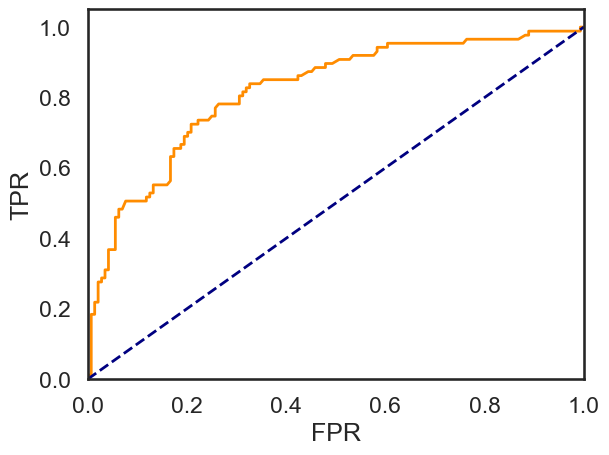

In [17]:
#Your code here    

#### This figure is called the ROC curve. why is this figure interesting? 

The Receiver operating characteristic curve (**ROC curve**) illustrates the performance of a binary classifier based on the *trade-off* between TPR (fraction of actual diabetic samples we correcly classify as diabetic) and FPR (fraction of non-diabetic samples we incorrectly classify as diabetic ) across different thresholds. 

The area under the ROC curve (**AUC**) is a commonly used metric for a classifier's performance. An AUC of 0.5 represents a completely random classifier (randomly guessing the sample's label).
An AUC of 1 represents a perfect classifier:
The model first finds all the people with diabetes without making any false positives
Then, as we lower the threshold, we might get false positives — but only after catching all true positives


Let's take an example of AUC = 1:

| Person | True Label   | Predicted Probability |
| ------ | ------------ | --------------------- |
| A      | 1 (diabetic) | 0.90                  |
| B      | 1 (diabetic) | 0.80                  |
| C      | 0 (healthy)  | 0.40                  |
| D      | 0 (healthy)  | 0.30                  |


| Threshold > x | Predicted Positives | TPR | FPR |
| ------------- | ------------------- | --- | --- |
| > 0.9         | none                | 0   | 0   |
| > 0.8         | A                   | 0.5 | 0   |
| > 0.4         | A, B                | 1.0 | 0   |
| > 0.3         | A, B, C             | 1.0 | 0.5 |
| ≥ 0.0         | all                 | 1.0 | 1.0 |


<img src="https://developers.google.com/static/machine-learning/crash-course/images/auc_1-0.png" width="500"/>


And let's take a look on example of AUC close to 0.5:
| Person | True Label (y) | Predicted Probability |
| ------ | -------------- | --------------------- |
| A      | 1 (positive)   | 0.9                   |
| B      | 0 (negative)   | 0.8                   |
| C      | 1 (positive)   | 0.7                   |
| D      | 0 (negative)   | 0.6                   |

| Threshold > t | Predicted Positives | TP | FP | TPR | FPR |
| ------------- | ------------------- | -- | -- | --- | --- |
| > 0.9         | none                | 0  | 0  | 0.0 | 0.0 |
| > 0.8         | A                   | 1  | 0  | 0.5 | 0.0 |
| > 0.7         | A, B                | 1  | 1  | 0.5 | 0.5 |
| > 0.6         | A, B, C             | 2  | 1  | 1.0 | 0.5 |
| ≥ 0.0         | A, B, C, D          | 2  | 2  | 1.0 | 1.0 |

<img src="https://developers.google.com/static/machine-learning/crash-course/images/auc_0-5.png" width="500"/>





Let's estimate the AUC of our classifier using the `roc_auc_score` function under `sklearn.metrics`.


In [15]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, lg_probs)
print(f"AUC = {round(auc,2)}")

AUC = 0.82


# Decision tree classifier

How does a decision tree classifier work?

The idea is to construct a series of yes/no questions after which we make a prediction about the class.
Each question focuses on the values of a single feature, and the choice of question can depend on the answers to previous questions.

Let's look at the distributions to try to come up with such questions.

In [16]:
def dist_compare(df, feature, th, ax=None, title=None):
    if ax is None: fig, ax = plt.subplots(figsize=(6, 4))
    positive = df['Outcome'] == 1
    sns.histplot(df.loc[positive, feature], bins=20, stat='probability', color='red', label='Positive', kde=False, ax=ax)
    sns.histplot(df.loc[~positive, feature], bins=20, stat='probability', color='blue', label='Negative', kde=False, ax=ax)
    ax.axvline(th, color='k', ls='--')
    ax.legend()
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    sns.despine()

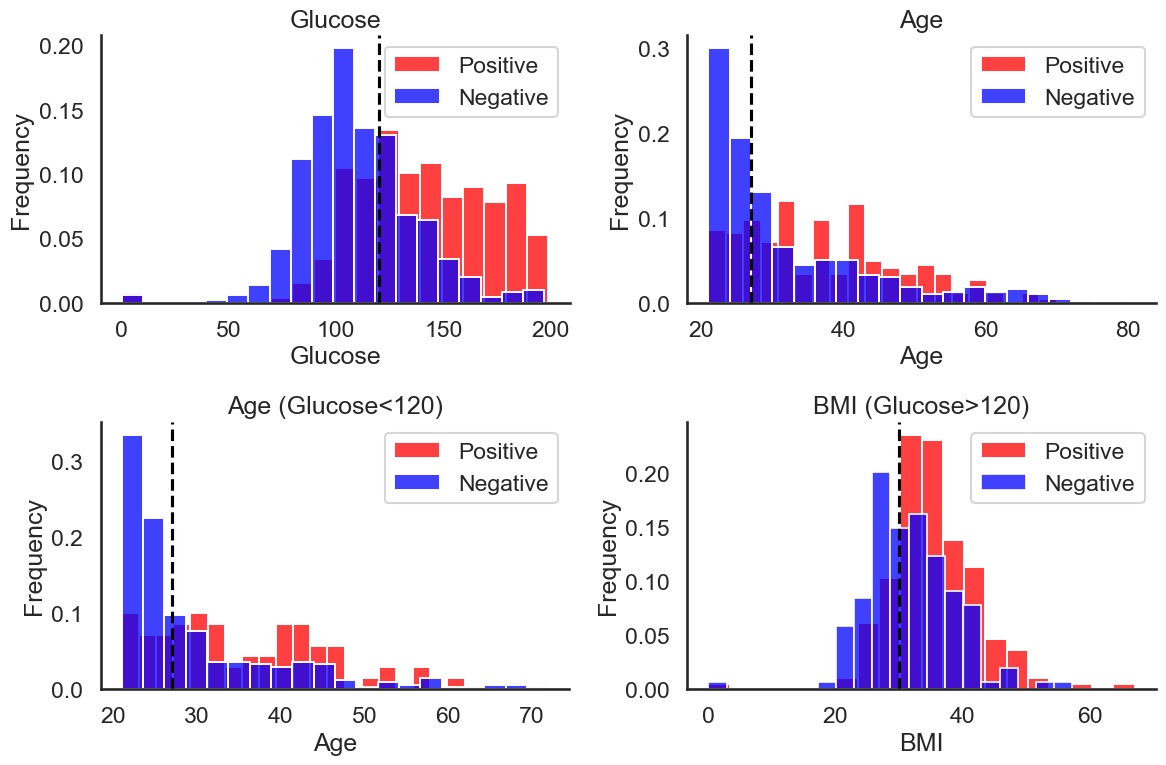

In [17]:
gluc_th = 120
fig, axes = plt.subplots(2, 2, figsize=(12, 8))    
dist_compare(df, 'Glucose', gluc_th, axes[0, 0], 'Glucose')
dist_compare(df, 'Age', 27, axes[0, 1], 'Age')
dist_compare(df[df['Glucose'] < gluc_th], 'Age', 27, axes[1,0], 'Age (Glucose<120)')
dist_compare(df[df['Glucose'] > gluc_th], 'BMI', 30, axes[1,1], 'BMI (Glucose>120)')
fig.tight_layout()

For this dataset, we might ask:
1. If Glucose below 120:
 1. If Age below 27: Negative
 1. Else: Positive
1. Else: 
 1. If BMI below 30: Negative
 1. Else: Positive
    
What is the accuracy of such a model?

In [18]:
def predict(df):
    return ((df['Glucose'] < 120) & (df['Age'] > 27)) | ((df['Glucose'] >= 120) & (df['BMI'] > 30))

yhat = predict(df)
print("Accuracy:", (yhat == df['Outcome']).mean())

Accuracy: 0.6458333333333334


Not very impressive, as the number of negative outcomes (zero) is about 0.65, so a model that always says "negative" will have the same accuracy.

In [19]:
print((df['Outcome'] == 0).mean())

0.6510416666666666


To get a better results, we need to come up with a series of such questions in a way that we minimize the [Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) of each additional "partition" made by the yes-no questions.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-54-22.png" width="600"/>

Gini impurity estimates the probability to make a classificaion error. That is, if the answer to some question determines the classification, what does the question need to be so that as many "positive" will be on one side, and as many "negatives" will be on the other side?

Let's use Scikit-learn to construct a decision tree.

In [20]:
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7056277056277056


What does this model actually do? Let's [visualize it](https://mljar.com/blog/visualize-decision-tree/).

In [21]:
print(sklearn.tree.export_text(classifier, feature_names=features, max_depth=3))

|--- Glucose <= 143.50
|   |--- Age <= 30.50
|   |   |--- BMI <= 31.40
|   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- Pregnancies >  7.50
|   |   |   |   |--- class: 1
|   |   |--- BMI >  31.40
|   |   |   |--- BloodPressure <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  37.00
|   |   |   |   |--- truncated branch of depth 11
|   |--- Age >  30.50
|   |   |--- Glucose <= 99.50
|   |   |   |--- BMI <= 34.65
|   |   |   |   |--- class: 0
|   |   |   |--- BMI >  34.65
|   |   |   |   |--- truncated branch of depth 4
|   |   |--- Glucose >  99.50
|   |   |   |--- BMI <= 26.90
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- BMI >  26.90
|   |   |   |   |--- truncated branch of depth 10
|--- Glucose >  143.50
|   |--- Glucose <= 159.50
|   |   |--- DiabetesPedigreeFunction <= 0.31
|   |   |   |--- BloodPressure <= 55.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  55.00
|   

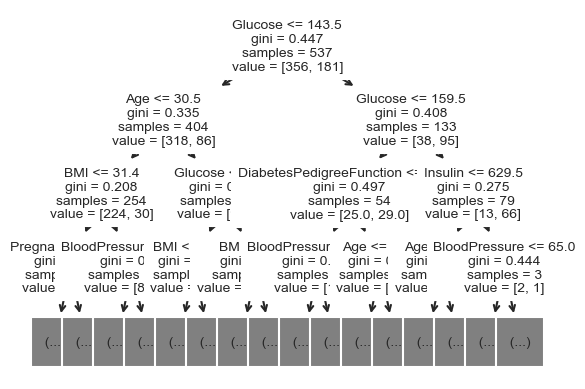

In [22]:
sklearn.tree.plot_tree(classifier, feature_names=features, max_depth=3, fontsize=10);

# Random Forest classifier

As we saw, the decision tree only gave us accuracy of about 65%. How can we improve upon it?

A common way to improve it is to use a simple ensemble algorithm: [_Bagging_](https://en.wikipedia.org/wiki/Bootstrap_aggregating). 

In ensemble algorithms, a set of models is trained, and prediction is made using some decision rule on the set of predictions.

Bagging means that we train the same model, but each time with a different resample of the data.

Let's see how that works with just 3 trees - first by fitting each tree to a resample of the dataset.

In [23]:
trees = [DecisionTreeClassifier() for i in range(3)]
for tr in trees: # this can be parallelized
    n = X_train.shape[0]
    idx = np.random.choice(n, n, replace=True)
    X_, y_ = X_train[idx], y_train[idx]        
    tr.fit(X_, y_)

In [24]:
print("Accuracy: ")
for tr in trees:
    print(tr.score(X_test, y_test))

Accuracy: 
0.6926406926406926
0.70995670995671
0.7186147186147186


Here's what each tree says for each sample in the test set (printing just the first 30 samples):

In [25]:
yhat = np.array([tr.predict(X_test) for tr in trees])
print(yhat[:, :30])

[[0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1]
 [1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1]]


In [26]:
yhat = yhat.sum(axis=0) >= 2
yhat = yhat.astype(int)
print(yhat[:30])

[0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1]


In [27]:
print("Accuracy: ", (yhat == y_test).mean())

Accuracy:  0.7445887445887446


So, an ensemble of such trees is a **random forest**: forest because it has many trees, and random because each tree is trained on a random sample of the data:

Key ideas:
1. Bootstrap sampling (a.k.a. bagging):
Each tree is trained on a random sample of the dataset with replacement:This is called a bootstrap sample.
2. Random feature selection:
When splitting a node in a tree, only a random subset of features is considered: This adds extra randomness so that not all trees end up looking the same.It makes trees more diverse, improving generalization.


We can use Scikit-learn's random forest classifier. If you want to use bagging with other models, there's a Scikit-learn's [ensemble module](https://scikit-learn.org/stable/modules/ensemble.html).

In [32]:
classifier = RandomForestClassifier(n_estimators=10, random_state = 42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


As mentioned above, we can use a `BaggingClassifier`, and supply to it the underlying model we want to use (in this case, a `DecisionTreeClassifier`). This would give similar results to the `RandomForestClassifier`, although it may be a bit different due to some default hyper-parameter values.

In [22]:
b_classifier = BaggingClassifier(DecisionTreeClassifier(), 10)

b_classifier.fit(X_train, y_train)

y_pred = b_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7532467532467533


How many trees should we use? The more the better? Are there diminishing returns? 
Each tree adds computational cost, both to the training and to the prediction, although much of the algorithm can be parallelised as different trees are independent.

We can create a **validation curve** which uses [cross-validation](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg) to train several models (here, random forest models), each with a different meta-parameter value (here, `n_estimators` that determines the number of trees in the forest), and displays the result.

As we can see, there seems to be diminishing returns, and using more than 20 trees doesn't seem to add much.

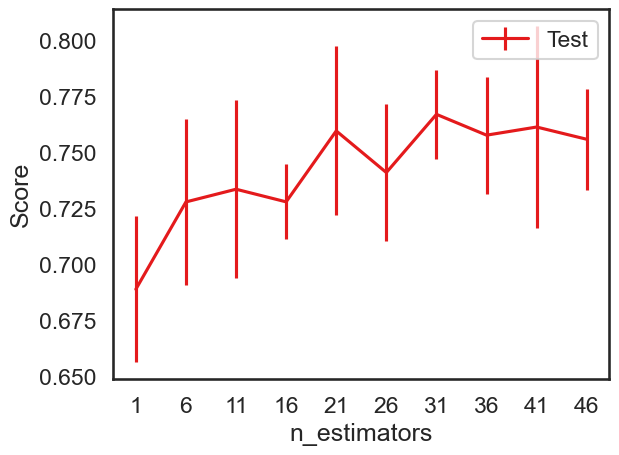

In [30]:
disp = ValidationCurveDisplay.from_estimator(
    classifier, X_train, y_train, score_type='test',
    param_name='n_estimators', param_range=np.arange(1, 51, 5), 
    std_display_style="errorbar"
)
plt.xticks(disp.param_range);

### Excercise 3
Do the same for the following parameters: max features and max depth. Choose an appropriate param grid.

max features: controls how many features the model considers at each split in the tree.

tree depth: limits the maximum depth of each tree (i.e., how many times it can split).

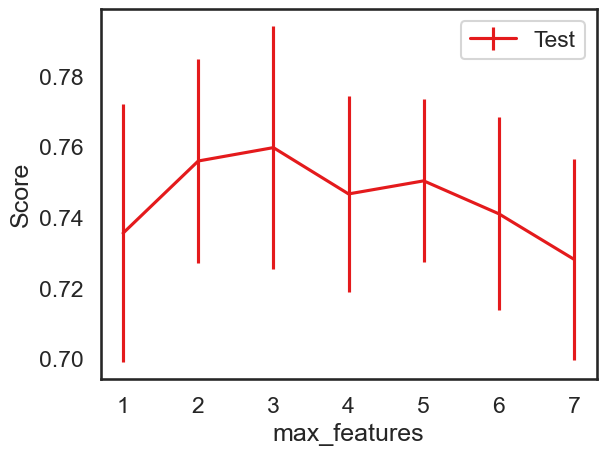

In [27]:
#Your code here

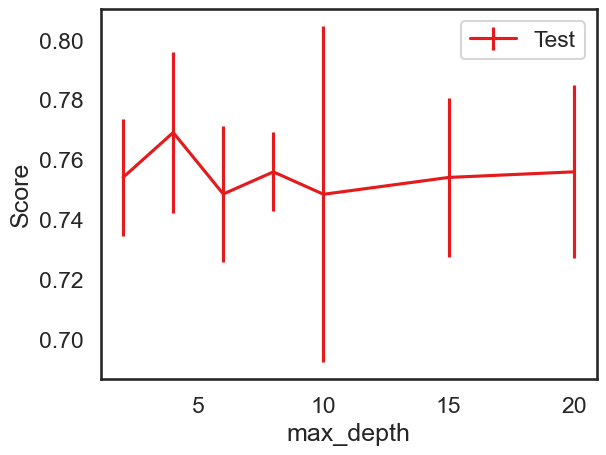

In [29]:
# Your code here

### Feature importance

Feature importance in a random forest model indicates the relative contribution of each feature (or predictor variable) in making predictions. It helps us understand which features are most influential in determining the outcome.

Random forest calculates feature importance based on how much each feature reduces impurity (or increases information gain) when making decisions at each split in the trees. Features that consistently lead to larger reductions in impurity across all trees are considered more important.

By analyzing feature importance, we can identify the key factors driving the predictions of the model. This insight can be valuable for feature selection, understanding the underlying relationships in the data, and gaining actionable insights for decision-making.

In [33]:
importances = classifier.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
4,Glucose,0.291316
2,BMI,0.158903
6,DiabetesPedigreeFunction,0.131599
3,Age,0.124463
0,Pregnancies,0.104269
5,BloodPressure,0.096275
1,Insulin,0.093173


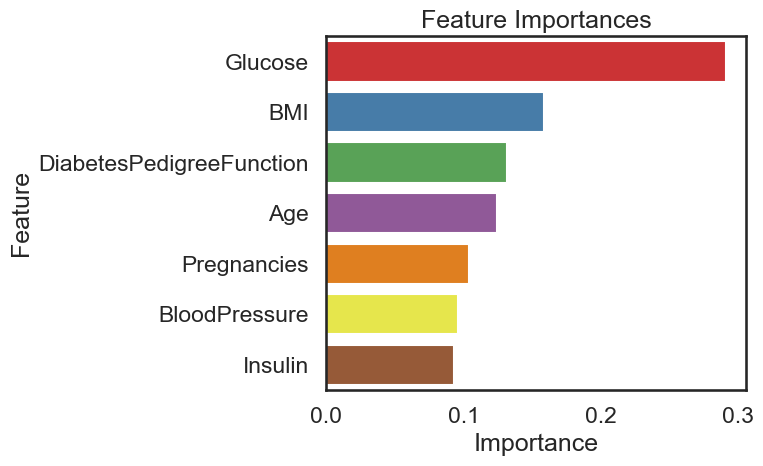

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()